In [ ]:
import pandas as pd
from statistics import mean, stdev
import plotly.graph_objects as go
import plotly.express as px
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from IPython.core.pylabtools import figsize
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

In [2]:
df = pd.read_csv(r"training data :) ") #VIX data from CBOE from 2004 to 2019 to predict 2020, available on official CBOE website
df.tail()

,Date,VIX Open,VIX High,VIX Low,VIX Close
3993,12-11-2019,12.64,13.10,12.36,12.68
3994,13-11-2019,12.91,13.90,12.88,13.00
3995,14-11-2019,13.16,13.81,12.93,13.05
3996,15-11-2019,12.95,12.97,11.92,12.05
3997,18-11-2019,12.39,13.10,12.32,12.46


In [ ]:
fig = go.Figure(data=[go.Candlestick(x=df['Date'],
                open=df['VIX Open'],
                high=df['VIX High'],
                low=df['VIX Low'],
                close=df['VIX Close'])])
fig.show()

In [4]:
stat_matrix = [] # enum 0 to 3: open, high, low, close
content = [df['VIX Open'], df['VIX High'], df['VIX Low'], df['VIX Close']]
for i in range(4):
        stat_matrix.append([min(content[i]), max(content[i]), mean(content[i]), stdev(content[i])])

In [5]:
training_set = df.iloc[:, 1:2].values

In [6]:
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)

In [7]:
X_train = []
y_train = []
for i in range(60, 2035):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [8]:
model = Sequential()

model.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
model.add(Dropout(0.2))

model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(0.2))

model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(0.2))

model.add(LSTM(units = 50))
model.add(Dropout(0.2))

model.add(Dense(units = 1))

model.compile(optimizer = 'adam', loss = 'mean_squared_error')

model.fit(X_train, y_train, epochs = 100, batch_size = 32)


Epoch 1/100
1975/1975 [==============================] - 10s 5ms/step - loss: 0.0093
Epoch 2/100
1975/1975 [==============================] - 9s 4ms/step - loss: 0.0041
Epoch 3/100
1975/1975 [==============================] - 8s 4ms/step - loss: 0.0032
Epoch 4/100
1975/1975 [==============================] - 8s 4ms/step - loss: 0.0033
Epoch 5/100
1975/1975 [==============================] - 8s 4ms/step - loss: 0.0030
Epoch 6/100
1975/1975 [==============================] - 8s 4ms/step - loss: 0.0026
Epoch 7/100
1975/1975 [==============================] - 8s 4ms/step - loss: 0.0028
Epoch 8/100
1975/1975 [==============================] - 8s 4ms/step - loss: 0.0025
Epoch 9/100
1975/1975 [==============================] - 8s 4ms/step - loss: 0.0026
Epoch 10/100
1975/1975 [==============================] - 8s 4ms/step - loss: 0.0023
Epoch 11/100
1975/1975 [==============================] - 8s 4ms/step - loss: 0.0021
Epoch 12/100
1975/1975 [==============================] - 8s 4ms/step - 

In [9]:
dataset_test = pd.read_csv(r"test data :) ") # received from CBOE website
observed_VIX = dataset_test.iloc[:, 1:2].values

In [10]:
dataset_total = pd.concat((df['VIX Open'], dataset_test['VIX Open']), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60 :].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(60, 257):
    X_test.append(inputs[i - 60 : i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_VIX = model.predict(X_test)
predicted_VIX = sc.inverse_transform(predicted_VIX)

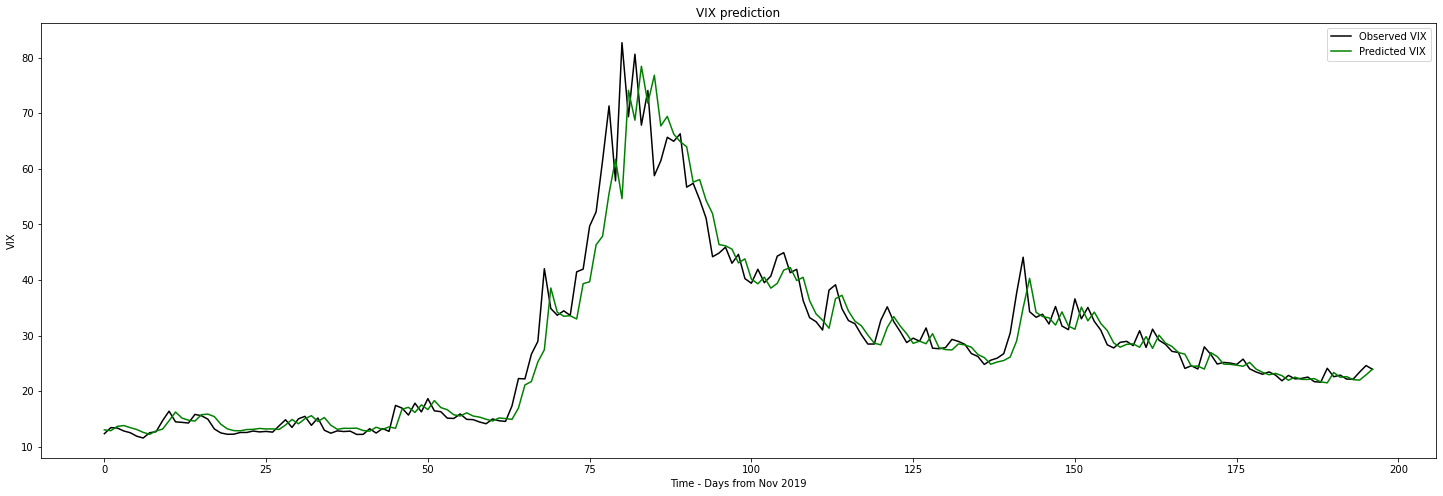

In [13]:
plt.plot(observed_VIX, color = 'black', label = 'Observed VIX')
plt.plot(predicted_VIX, color = 'green', label = 'Predicted VIX')
plt.title('VIX prediction')
plt.xlabel('Time - Days from Nov 2019')
plt.ylabel('VIX')
plt.legend()
figsize(25, 8)
plt.show()

Not bad to predict a volatile trend ! BTW it is just based on open and day high as independent parameters. It is not accurate due to small memory window of LSTM. Next time with something better. Adios :) 